In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.__version__

'2.10.1'

In [2]:
# lets import the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
# normalizing the data
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
# reshaping the data
x_image_train = x_train.reshape(-1, 28, 28, 1)
x_image_train = tf.cast(x_image_train, 'float32')
x_image_test = x_test.reshape(-1, 28, 28, 1)
x_image_test = tf.cast(x_image_test, 'float32')

In [4]:
## Creating AutoEncoder class
class AutoEncoder(tf.keras.Model):
    def __init__(self, n_hidden_1, n_hidden_2, n_encoding, n_input):
        super(AutoEncoder, self).__init__()
        # initialize layers
#         self.flatten = tf.keras.layers.Flatten()
        self.encoding_1 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
        self.encoding_2 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
        self.encoding_final = tf.keras.layers.Dense(n_encoding, activation=tf.nn.relu)
        self.decoding_1 = tf.keras.layers.Dense(n_hidden_2, activation=tf.nn.sigmoid)
        self.decoding_2 = tf.keras.layers.Dense(n_hidden_1, activation=tf.nn.sigmoid)
        self.decoding_final = tf.keras.layers.Dense(n_input)
        
    def encoder(self, x):
        # encoding layer
#         x = self.flatten(x)
        x = self.encoding_1(x)
        x = self.encoding_2(x)
        x = self.encoding_final(x)
        return x
    
    def decoder(self, x):
        # decoding layer
        x = self.decoding_1(x)
        x = self.decoding_2(x)
        x = self.decoding_final(x)
        return x
    
    def call(self, x):
        # calling encoding and decoding layer
        encoder_op = self.encoder(x)
        # Reconstructed image
        y_pred = self.decoder(encoder_op)
        return y_pred

In [5]:
def cost(y_pred, y_true):
    # cost function
    loss = tf.losses.mean_squared_error(y_true, y_pred)
    cost = tf.reduce_mean(loss)
    return cost

In [6]:
def grad(model, inputs, targets):
    # gradient calc function
    with tf.GradientTape() as tape:
        reconstruction = model(inputs)
        loss_val = cost(reconstruction, targets)
        grads = tape.gradient(loss_val, model.trainable_variables)
    return loss_val, grads, reconstruction

In [7]:
def optimizer(lr):
    return tf.keras.optimizers.RMSprop(learning_rate=lr)

In [8]:
# initialize input shapes for data, hidden layers, batch size, epochs and learning rate
n_input = 28*28
n_hidden_1 = 512
n_hidden_2 = 256
n_encoding = 32
lr = 0.01
epochs = 20
batch_size = 256
total_batch = int(len(x_image_train)/batch_size)

In [9]:
# flatten layer
flatten = tf.keras.layers.Flatten()
x_train = flatten(x_train)

In [10]:
# initialize model
model = AutoEncoder(n_hidden_1, n_hidden_2, n_encoding, n_input)
# get optimizer
opt = optimizer(lr)
# run training
for epoch in range(epochs):
    for i in range(total_batch):
        # divide training data according to batch size
        x_input = x_train[i:i+batch_size]
        loss, grads, reconstruction = grad(model, x_input, x_input)
        opt.apply_gradients(zip(grads, model.trainable_variables))
        
        if epoch % 1 == 0:
            print(f"Epoch: {epoch} --- Cost: {loss}")

print("Training complete")

Epoch: 0 --- Cost: 0.31392061710357666
Epoch: 0 --- Cost: 7.071088790893555
Epoch: 0 --- Cost: 0.11777191609144211
Epoch: 0 --- Cost: 0.09270031750202179
Epoch: 0 --- Cost: 0.08415022492408752
Epoch: 0 --- Cost: 0.07633081078529358
Epoch: 0 --- Cost: 0.07084193825721741
Epoch: 0 --- Cost: 0.06785035878419876
Epoch: 0 --- Cost: 0.06639402359724045
Epoch: 0 --- Cost: 0.06584271788597107
Epoch: 0 --- Cost: 0.06562280654907227
Epoch: 0 --- Cost: 0.06559661775827408
Epoch: 0 --- Cost: 0.06550128012895584
Epoch: 0 --- Cost: 0.06533379852771759
Epoch: 0 --- Cost: 0.06527149677276611
Epoch: 0 --- Cost: 0.06525126099586487
Epoch: 0 --- Cost: 0.06521613895893097
Epoch: 0 --- Cost: 0.06526143103837967
Epoch: 0 --- Cost: 0.06528383493423462
Epoch: 0 --- Cost: 0.06537923216819763
Epoch: 0 --- Cost: 0.06557462364435196
Epoch: 0 --- Cost: 0.06569502502679825
Epoch: 0 --- Cost: 0.06682652235031128
Epoch: 0 --- Cost: 0.06804969906806946
Epoch: 0 --- Cost: 0.06953240931034088
Epoch: 0 --- Cost: 0.069819

Epoch: 0 --- Cost: 0.06801280379295349
Epoch: 0 --- Cost: 0.0693698599934578
Epoch: 0 --- Cost: 0.0700506940484047
Epoch: 0 --- Cost: 0.06876415759325027
Epoch: 0 --- Cost: 0.06718481332063675
Epoch: 0 --- Cost: 0.06625724583864212
Epoch: 0 --- Cost: 0.06607893854379654
Epoch: 0 --- Cost: 0.06605564802885056
Epoch: 0 --- Cost: 0.06604822725057602
Epoch: 0 --- Cost: 0.06592808663845062
Epoch: 0 --- Cost: 0.0664554089307785
Epoch: 0 --- Cost: 0.06834203749895096
Epoch: 0 --- Cost: 0.07412755489349365
Epoch: 0 --- Cost: 0.06709509342908859
Epoch: 0 --- Cost: 0.06594546884298325
Epoch: 0 --- Cost: 0.06541411578655243
Epoch: 0 --- Cost: 0.06552372872829437
Epoch: 0 --- Cost: 0.06558156758546829
Epoch: 0 --- Cost: 0.06600764393806458
Epoch: 0 --- Cost: 0.06620059162378311
Epoch: 0 --- Cost: 0.06597712635993958
Epoch: 0 --- Cost: 0.06565471738576889
Epoch: 1 --- Cost: 0.06717678904533386
Epoch: 1 --- Cost: 0.06561696529388428
Epoch: 1 --- Cost: 0.06526786088943481
Epoch: 1 --- Cost: 0.0655262

Epoch: 1 --- Cost: 0.0433039590716362
Epoch: 1 --- Cost: 0.0431348979473114
Epoch: 1 --- Cost: 0.04310367628931999
Epoch: 1 --- Cost: 0.042837705463171005
Epoch: 1 --- Cost: 0.04311547428369522
Epoch: 1 --- Cost: 0.042747728526592255
Epoch: 1 --- Cost: 0.04273999482393265
Epoch: 1 --- Cost: 0.0436893105506897
Epoch: 1 --- Cost: 0.043808504939079285
Epoch: 1 --- Cost: 0.04321233183145523
Epoch: 1 --- Cost: 0.04237540066242218
Epoch: 1 --- Cost: 0.041647959500551224
Epoch: 1 --- Cost: 0.041700415313243866
Epoch: 1 --- Cost: 0.04250564053654671
Epoch: 1 --- Cost: 0.04337722063064575
Epoch: 1 --- Cost: 0.04411813244223595
Epoch: 1 --- Cost: 0.04199462756514549
Epoch: 1 --- Cost: 0.04176405444741249
Epoch: 1 --- Cost: 0.0415254682302475
Epoch: 1 --- Cost: 0.042128972709178925
Epoch: 1 --- Cost: 0.04182378202676773
Epoch: 1 --- Cost: 0.04252249002456665
Epoch: 1 --- Cost: 0.04401332885026932
Epoch: 1 --- Cost: 0.04472753405570984
Epoch: 1 --- Cost: 0.042379364371299744
Epoch: 1 --- Cost: 0.0

Epoch: 2 --- Cost: 0.03685139864683151
Epoch: 2 --- Cost: 0.03594242408871651
Epoch: 2 --- Cost: 0.035938721150159836
Epoch: 2 --- Cost: 0.03637300431728363
Epoch: 2 --- Cost: 0.03650487959384918
Epoch: 2 --- Cost: 0.03641829639673233
Epoch: 2 --- Cost: 0.03628012165427208
Epoch: 2 --- Cost: 0.036037467420101166
Epoch: 2 --- Cost: 0.03652741014957428
Epoch: 2 --- Cost: 0.036899764090776443
Epoch: 2 --- Cost: 0.03755047544836998
Epoch: 2 --- Cost: 0.03835482895374298
Epoch: 2 --- Cost: 0.037715278565883636
Epoch: 2 --- Cost: 0.038329124450683594
Epoch: 2 --- Cost: 0.03651543706655502
Epoch: 2 --- Cost: 0.03681245446205139
Epoch: 2 --- Cost: 0.03647736832499504
Epoch: 2 --- Cost: 0.03683079779148102
Epoch: 2 --- Cost: 0.03654542937874794
Epoch: 2 --- Cost: 0.036483533680438995
Epoch: 2 --- Cost: 0.03632500022649765
Epoch: 2 --- Cost: 0.03599313274025917
Epoch: 2 --- Cost: 0.03574076667428017
Epoch: 2 --- Cost: 0.03546793758869171
Epoch: 2 --- Cost: 0.03538137674331665
Epoch: 2 --- Cost: 

Epoch: 3 --- Cost: 0.035409070551395416
Epoch: 3 --- Cost: 0.035361140966415405
Epoch: 3 --- Cost: 0.03492725268006325
Epoch: 3 --- Cost: 0.03506067767739296
Epoch: 3 --- Cost: 0.03503762185573578
Epoch: 3 --- Cost: 0.035543154925107956
Epoch: 3 --- Cost: 0.03622504323720932
Epoch: 3 --- Cost: 0.03560510277748108
Epoch: 3 --- Cost: 0.03526291996240616
Epoch: 3 --- Cost: 0.03422209993004799
Epoch: 3 --- Cost: 0.03401881083846092
Epoch: 3 --- Cost: 0.0338778980076313
Epoch: 3 --- Cost: 0.03435581550002098
Epoch: 3 --- Cost: 0.0342487171292305
Epoch: 3 --- Cost: 0.034559670835733414
Epoch: 3 --- Cost: 0.03465874865651131
Epoch: 3 --- Cost: 0.03524509072303772
Epoch: 3 --- Cost: 0.035631898790597916
Epoch: 3 --- Cost: 0.03501885384321213
Epoch: 3 --- Cost: 0.03473848104476929
Epoch: 3 --- Cost: 0.03366059809923172
Epoch: 3 --- Cost: 0.03336319699883461
Epoch: 3 --- Cost: 0.03325511887669563
Epoch: 3 --- Cost: 0.03308850899338722
Epoch: 3 --- Cost: 0.03325110301375389
Epoch: 3 --- Cost: 0.0

Epoch: 4 --- Cost: 0.033008478581905365
Epoch: 4 --- Cost: 0.03242496773600578
Epoch: 4 --- Cost: 0.03184492886066437
Epoch: 4 --- Cost: 0.03191251680254936
Epoch: 4 --- Cost: 0.03205309435725212
Epoch: 4 --- Cost: 0.03285966068506241
Epoch: 4 --- Cost: 0.03320401906967163
Epoch: 4 --- Cost: 0.03327052667737007
Epoch: 4 --- Cost: 0.033082518726587296
Epoch: 4 --- Cost: 0.03357857093214989
Epoch: 4 --- Cost: 0.03401404991745949
Epoch: 4 --- Cost: 0.03424406424164772
Epoch: 4 --- Cost: 0.03318094089627266
Epoch: 4 --- Cost: 0.03338015824556351
Epoch: 4 --- Cost: 0.03257131576538086
Epoch: 4 --- Cost: 0.03174038231372833
Epoch: 4 --- Cost: 0.03166923299431801
Epoch: 4 --- Cost: 0.03185056895017624
Epoch: 4 --- Cost: 0.03228054940700531
Epoch: 4 --- Cost: 0.03293812274932861
Epoch: 4 --- Cost: 0.03334088623523712
Epoch: 4 --- Cost: 0.03337002918124199
Epoch: 4 --- Cost: 0.03250502794981003
Epoch: 4 --- Cost: 0.03178531676530838
Epoch: 4 --- Cost: 0.03159959614276886
Epoch: 4 --- Cost: 0.03

Epoch: 5 --- Cost: 0.030814753845334053
Epoch: 5 --- Cost: 0.030828962102532387
Epoch: 5 --- Cost: 0.030752379447221756
Epoch: 5 --- Cost: 0.030640555545687675
Epoch: 5 --- Cost: 0.030591871589422226
Epoch: 5 --- Cost: 0.030751483514904976
Epoch: 5 --- Cost: 0.03171016648411751
Epoch: 5 --- Cost: 0.03272641450166702
Epoch: 5 --- Cost: 0.033166442066431046
Epoch: 5 --- Cost: 0.03180750459432602
Epoch: 5 --- Cost: 0.0313318707048893
Epoch: 5 --- Cost: 0.030672747641801834
Epoch: 5 --- Cost: 0.030267370864748955
Epoch: 5 --- Cost: 0.03027886152267456
Epoch: 5 --- Cost: 0.030245346948504448
Epoch: 5 --- Cost: 0.030365850776433945
Epoch: 5 --- Cost: 0.030543653294444084
Epoch: 5 --- Cost: 0.030524967238307
Epoch: 5 --- Cost: 0.03082779049873352
Epoch: 5 --- Cost: 0.03054726868867874
Epoch: 5 --- Cost: 0.030121054500341415
Epoch: 5 --- Cost: 0.029858548194169998
Epoch: 5 --- Cost: 0.03023676760494709
Epoch: 5 --- Cost: 0.030447321012616158
Epoch: 5 --- Cost: 0.03167377784848213
Epoch: 5 --- 

Epoch: 6 --- Cost: 0.028901953250169754
Epoch: 6 --- Cost: 0.028911003842949867
Epoch: 6 --- Cost: 0.0288919135928154
Epoch: 6 --- Cost: 0.029148565605282784
Epoch: 6 --- Cost: 0.029248420149087906
Epoch: 6 --- Cost: 0.029292941093444824
Epoch: 6 --- Cost: 0.030407190322875977
Epoch: 6 --- Cost: 0.034410860389471054
Epoch: 6 --- Cost: 0.03277704119682312
Epoch: 6 --- Cost: 0.030938487499952316
Epoch: 6 --- Cost: 0.029372213408350945
Epoch: 6 --- Cost: 0.028634142130613327
Epoch: 6 --- Cost: 0.028238598257303238
Epoch: 6 --- Cost: 0.028225736692547798
Epoch: 6 --- Cost: 0.02822902426123619
Epoch: 6 --- Cost: 0.028319086879491806
Epoch: 6 --- Cost: 0.02829032763838768
Epoch: 6 --- Cost: 0.028538312762975693
Epoch: 6 --- Cost: 0.028298672288656235
Epoch: 6 --- Cost: 0.028703758493065834
Epoch: 6 --- Cost: 0.028102491050958633
Epoch: 6 --- Cost: 0.028348272666335106
Epoch: 6 --- Cost: 0.028051264584064484
Epoch: 6 --- Cost: 0.028658585622906685
Epoch: 6 --- Cost: 0.028443310409784317
Epoch

Epoch: 7 --- Cost: 0.028524087741971016
Epoch: 7 --- Cost: 0.02874401956796646
Epoch: 7 --- Cost: 0.028743401169776917
Epoch: 7 --- Cost: 0.028121506795287132
Epoch: 7 --- Cost: 0.027978146448731422
Epoch: 7 --- Cost: 0.027859723195433617
Epoch: 7 --- Cost: 0.02801409550011158
Epoch: 7 --- Cost: 0.02778024971485138
Epoch: 7 --- Cost: 0.028381219133734703
Epoch: 7 --- Cost: 0.027803367003798485
Epoch: 7 --- Cost: 0.02789613977074623
Epoch: 7 --- Cost: 0.028350647538900375
Epoch: 7 --- Cost: 0.02867254801094532
Epoch: 7 --- Cost: 0.02897696942090988
Epoch: 7 --- Cost: 0.028205960988998413
Epoch: 7 --- Cost: 0.026991745457053185
Epoch: 7 --- Cost: 0.02689521387219429
Epoch: 7 --- Cost: 0.02688768319785595
Epoch: 7 --- Cost: 0.027431802824139595
Epoch: 7 --- Cost: 0.027322201058268547
Epoch: 7 --- Cost: 0.027663297951221466
Epoch: 7 --- Cost: 0.027611786499619484
Epoch: 7 --- Cost: 0.027665451169013977
Epoch: 7 --- Cost: 0.02765653096139431
Epoch: 7 --- Cost: 0.027948467060923576
Epoch: 7 

Epoch: 8 --- Cost: 0.027858134359121323
Epoch: 8 --- Cost: 0.02806483767926693
Epoch: 8 --- Cost: 0.02825269103050232
Epoch: 8 --- Cost: 0.028346825391054153
Epoch: 8 --- Cost: 0.028570178896188736
Epoch: 8 --- Cost: 0.029592959210276604
Epoch: 8 --- Cost: 0.02915916219353676
Epoch: 8 --- Cost: 0.02990703284740448
Epoch: 8 --- Cost: 0.027883021160960197
Epoch: 8 --- Cost: 0.028380168601870537
Epoch: 8 --- Cost: 0.02797454223036766
Epoch: 8 --- Cost: 0.028788026422262192
Epoch: 8 --- Cost: 0.02850949764251709
Epoch: 8 --- Cost: 0.0279381200671196
Epoch: 8 --- Cost: 0.02738872356712818
Epoch: 8 --- Cost: 0.026947828009724617
Epoch: 8 --- Cost: 0.026399079710245132
Epoch: 8 --- Cost: 0.025941569358110428
Epoch: 8 --- Cost: 0.025743674486875534
Epoch: 8 --- Cost: 0.026204653084278107
Epoch: 8 --- Cost: 0.026325784623622894
Epoch: 8 --- Cost: 0.02714473195374012
Epoch: 8 --- Cost: 0.02722245268523693
Epoch: 8 --- Cost: 0.027974434196949005
Epoch: 8 --- Cost: 0.026692727580666542
Epoch: 8 --

Epoch: 8 --- Cost: 0.02323964238166809
Epoch: 8 --- Cost: 0.023416101932525635
Epoch: 8 --- Cost: 0.0236051082611084
Epoch: 9 --- Cost: 0.03794017434120178
Epoch: 9 --- Cost: 0.036170653998851776
Epoch: 9 --- Cost: 0.03335201367735863
Epoch: 9 --- Cost: 0.03234167397022247
Epoch: 9 --- Cost: 0.03183814510703087
Epoch: 9 --- Cost: 0.03204813599586487
Epoch: 9 --- Cost: 0.031024042516946793
Epoch: 9 --- Cost: 0.030713994055986404
Epoch: 9 --- Cost: 0.030148455873131752
Epoch: 9 --- Cost: 0.029047373682260513
Epoch: 9 --- Cost: 0.02855650894343853
Epoch: 9 --- Cost: 0.028753612190485
Epoch: 9 --- Cost: 0.030079040676355362
Epoch: 9 --- Cost: 0.030436133965849876
Epoch: 9 --- Cost: 0.029269441962242126
Epoch: 9 --- Cost: 0.028162898495793343
Epoch: 9 --- Cost: 0.028226172551512718
Epoch: 9 --- Cost: 0.02764366939663887
Epoch: 9 --- Cost: 0.027658065780997276
Epoch: 9 --- Cost: 0.027379630133509636
Epoch: 9 --- Cost: 0.027431227266788483
Epoch: 9 --- Cost: 0.02673419937491417
Epoch: 9 --- C

Epoch: 9 --- Cost: 0.02129795216023922
Epoch: 9 --- Cost: 0.02085256390273571
Epoch: 9 --- Cost: 0.02112627774477005
Epoch: 9 --- Cost: 0.020784396678209305
Epoch: 9 --- Cost: 0.021568626165390015
Epoch: 9 --- Cost: 0.021945936605334282
Epoch: 9 --- Cost: 0.02294151857495308
Epoch: 9 --- Cost: 0.023059062659740448
Epoch: 9 --- Cost: 0.022132638841867447
Epoch: 9 --- Cost: 0.021150799468159676
Epoch: 9 --- Cost: 0.0212252177298069
Epoch: 9 --- Cost: 0.021803319454193115
Epoch: 9 --- Cost: 0.023024721071124077
Epoch: 9 --- Cost: 0.02352626994252205
Epoch: 9 --- Cost: 0.02368226647377014
Epoch: 9 --- Cost: 0.021947063505649567
Epoch: 9 --- Cost: 0.02125610038638115
Epoch: 9 --- Cost: 0.020970959216356277
Epoch: 9 --- Cost: 0.021117672324180603
Epoch: 9 --- Cost: 0.021140048280358315
Epoch: 9 --- Cost: 0.021868443116545677
Epoch: 9 --- Cost: 0.021753305569291115
Epoch: 9 --- Cost: 0.022423584014177322
Epoch: 9 --- Cost: 0.02232331782579422
Epoch: 9 --- Cost: 0.022518957033753395
Epoch: 9 -

Epoch: 10 --- Cost: 0.018808815628290176
Epoch: 10 --- Cost: 0.020009160041809082
Epoch: 10 --- Cost: 0.019595352932810783
Epoch: 10 --- Cost: 0.020610732957720757
Epoch: 10 --- Cost: 0.01992521993815899
Epoch: 10 --- Cost: 0.019857197999954224
Epoch: 10 --- Cost: 0.01925690472126007
Epoch: 10 --- Cost: 0.019443349912762642
Epoch: 10 --- Cost: 0.019321424886584282
Epoch: 10 --- Cost: 0.01947542279958725
Epoch: 10 --- Cost: 0.019358307123184204
Epoch: 10 --- Cost: 0.020017465576529503
Epoch: 10 --- Cost: 0.019921496510505676
Epoch: 10 --- Cost: 0.020433422178030014
Epoch: 10 --- Cost: 0.019918950274586678
Epoch: 10 --- Cost: 0.020128736272454262
Epoch: 10 --- Cost: 0.020379232242703438
Epoch: 10 --- Cost: 0.019648686051368713
Epoch: 10 --- Cost: 0.019857682287693024
Epoch: 10 --- Cost: 0.020076826214790344
Epoch: 10 --- Cost: 0.020316319540143013
Epoch: 10 --- Cost: 0.019993282854557037
Epoch: 10 --- Cost: 0.020131459459662437
Epoch: 10 --- Cost: 0.019530879333615303
Epoch: 10 --- Cost:

Epoch: 11 --- Cost: 0.01847979985177517
Epoch: 11 --- Cost: 0.01822790876030922
Epoch: 11 --- Cost: 0.0185198076069355
Epoch: 11 --- Cost: 0.018433725461363792
Epoch: 11 --- Cost: 0.019213169813156128
Epoch: 11 --- Cost: 0.018433045595884323
Epoch: 11 --- Cost: 0.019226254895329475
Epoch: 11 --- Cost: 0.017910612747073174
Epoch: 11 --- Cost: 0.018221929669380188
Epoch: 11 --- Cost: 0.017728371545672417
Epoch: 11 --- Cost: 0.017795896157622337
Epoch: 11 --- Cost: 0.01776275597512722
Epoch: 11 --- Cost: 0.018354445695877075
Epoch: 11 --- Cost: 0.01838226616382599
Epoch: 11 --- Cost: 0.01880614459514618
Epoch: 11 --- Cost: 0.018077298998832703
Epoch: 11 --- Cost: 0.018192850053310394
Epoch: 11 --- Cost: 0.01773723028600216
Epoch: 11 --- Cost: 0.017526203766465187
Epoch: 11 --- Cost: 0.017535848543047905
Epoch: 11 --- Cost: 0.0177886001765728
Epoch: 11 --- Cost: 0.017698073759675026
Epoch: 11 --- Cost: 0.01796601712703705
Epoch: 11 --- Cost: 0.01764855533838272
Epoch: 11 --- Cost: 0.018531

Epoch: 12 --- Cost: 0.01676018536090851
Epoch: 12 --- Cost: 0.016678016632795334
Epoch: 12 --- Cost: 0.016884174197912216
Epoch: 12 --- Cost: 0.01711823046207428
Epoch: 12 --- Cost: 0.017493903636932373
Epoch: 12 --- Cost: 0.017357297241687775
Epoch: 12 --- Cost: 0.01723383367061615
Epoch: 12 --- Cost: 0.016683943569660187
Epoch: 12 --- Cost: 0.016713539138436317
Epoch: 12 --- Cost: 0.016486652195453644
Epoch: 12 --- Cost: 0.016903240233659744
Epoch: 12 --- Cost: 0.016407830640673637
Epoch: 12 --- Cost: 0.01712910085916519
Epoch: 12 --- Cost: 0.016898630186915398
Epoch: 12 --- Cost: 0.018352890387177467
Epoch: 12 --- Cost: 0.017655931413173676
Epoch: 12 --- Cost: 0.0184640996158123
Epoch: 12 --- Cost: 0.016997333616018295
Epoch: 12 --- Cost: 0.016714125871658325
Epoch: 12 --- Cost: 0.016435688361525536
Epoch: 12 --- Cost: 0.016883885487914085
Epoch: 12 --- Cost: 0.01689736172556877
Epoch: 12 --- Cost: 0.01789170503616333
Epoch: 12 --- Cost: 0.01743326708674431
Epoch: 12 --- Cost: 0.018

Epoch: 13 --- Cost: 0.016640614718198776
Epoch: 13 --- Cost: 0.016690155491232872
Epoch: 13 --- Cost: 0.016643604263663292
Epoch: 13 --- Cost: 0.016345594078302383
Epoch: 13 --- Cost: 0.016245421022176743
Epoch: 13 --- Cost: 0.01594425179064274
Epoch: 13 --- Cost: 0.016645731404423714
Epoch: 13 --- Cost: 0.016177799552679062
Epoch: 13 --- Cost: 0.01663147658109665
Epoch: 13 --- Cost: 0.01561097800731659
Epoch: 13 --- Cost: 0.015912480652332306
Epoch: 13 --- Cost: 0.015509849414229393
Epoch: 13 --- Cost: 0.016291217878460884
Epoch: 13 --- Cost: 0.015918103978037834
Epoch: 13 --- Cost: 0.01650347374379635
Epoch: 13 --- Cost: 0.015823466703295708
Epoch: 13 --- Cost: 0.016202082857489586
Epoch: 13 --- Cost: 0.015772193670272827
Epoch: 13 --- Cost: 0.016916988417506218
Epoch: 13 --- Cost: 0.01625567115843296
Epoch: 13 --- Cost: 0.016262486577033997
Epoch: 13 --- Cost: 0.01597001776099205
Epoch: 13 --- Cost: 0.01605774462223053
Epoch: 13 --- Cost: 0.016980232670903206
Epoch: 13 --- Cost: 0.0

Epoch: 14 --- Cost: 0.01614995114505291
Epoch: 14 --- Cost: 0.015981776639819145
Epoch: 14 --- Cost: 0.016120847314596176
Epoch: 14 --- Cost: 0.015794208273291588
Epoch: 14 --- Cost: 0.016387006267905235
Epoch: 14 --- Cost: 0.01584417000412941
Epoch: 14 --- Cost: 0.016811687499284744
Epoch: 14 --- Cost: 0.01549371425062418
Epoch: 14 --- Cost: 0.015834998339414597
Epoch: 14 --- Cost: 0.014944653958082199
Epoch: 14 --- Cost: 0.015242191031575203
Epoch: 14 --- Cost: 0.014799290336668491
Epoch: 14 --- Cost: 0.015260228887200356
Epoch: 14 --- Cost: 0.01509445533156395
Epoch: 14 --- Cost: 0.01566542126238346
Epoch: 14 --- Cost: 0.015588725917041302
Epoch: 14 --- Cost: 0.016485363245010376
Epoch: 14 --- Cost: 0.0174676775932312
Epoch: 14 --- Cost: 0.018150657415390015
Epoch: 14 --- Cost: 0.017978806048631668
Epoch: 14 --- Cost: 0.01632653921842575
Epoch: 14 --- Cost: 0.01515323668718338
Epoch: 14 --- Cost: 0.015219036489725113
Epoch: 14 --- Cost: 0.014876779168844223
Epoch: 14 --- Cost: 0.015

Epoch: 15 --- Cost: 0.017185498028993607
Epoch: 15 --- Cost: 0.017122672870755196
Epoch: 15 --- Cost: 0.017835084348917007
Epoch: 15 --- Cost: 0.01686549000442028
Epoch: 15 --- Cost: 0.017342576757073402
Epoch: 15 --- Cost: 0.016761817038059235
Epoch: 15 --- Cost: 0.01718883588910103
Epoch: 15 --- Cost: 0.016346918419003487
Epoch: 15 --- Cost: 0.01623288169503212
Epoch: 15 --- Cost: 0.015836890786886215
Epoch: 15 --- Cost: 0.0158156156539917
Epoch: 15 --- Cost: 0.01581069640815258
Epoch: 15 --- Cost: 0.015822527930140495
Epoch: 15 --- Cost: 0.016112545505166054
Epoch: 15 --- Cost: 0.016570139676332474
Epoch: 15 --- Cost: 0.01759336329996586
Epoch: 15 --- Cost: 0.016074666753411293
Epoch: 15 --- Cost: 0.01597408577799797
Epoch: 15 --- Cost: 0.014706620946526527
Epoch: 15 --- Cost: 0.014971120283007622
Epoch: 15 --- Cost: 0.014870492741465569
Epoch: 15 --- Cost: 0.01610073819756508
Epoch: 15 --- Cost: 0.015284634195268154
Epoch: 15 --- Cost: 0.015941442921757698
Epoch: 15 --- Cost: 0.015

Epoch: 16 --- Cost: 0.03256157040596008
Epoch: 16 --- Cost: 0.02899419516324997
Epoch: 16 --- Cost: 0.028401648625731468
Epoch: 16 --- Cost: 0.02610918879508972
Epoch: 16 --- Cost: 0.023294722661376
Epoch: 16 --- Cost: 0.022087611258029938
Epoch: 16 --- Cost: 0.021568411961197853
Epoch: 16 --- Cost: 0.02145346812903881
Epoch: 16 --- Cost: 0.021117351949214935
Epoch: 16 --- Cost: 0.02088969200849533
Epoch: 16 --- Cost: 0.020497137680649757
Epoch: 16 --- Cost: 0.019702123478055
Epoch: 16 --- Cost: 0.019593076780438423
Epoch: 16 --- Cost: 0.019531292840838432
Epoch: 16 --- Cost: 0.019621267914772034
Epoch: 16 --- Cost: 0.018974753096699715
Epoch: 16 --- Cost: 0.01877782680094242
Epoch: 16 --- Cost: 0.01805431768298149
Epoch: 16 --- Cost: 0.017659198492765427
Epoch: 16 --- Cost: 0.017376266419887543
Epoch: 16 --- Cost: 0.01727890968322754
Epoch: 16 --- Cost: 0.016996407881379128
Epoch: 16 --- Cost: 0.017194712534546852
Epoch: 16 --- Cost: 0.01749669387936592
Epoch: 16 --- Cost: 0.018187392

Epoch: 16 --- Cost: 0.01508550439029932
Epoch: 16 --- Cost: 0.017284464091062546
Epoch: 16 --- Cost: 0.01743963733315468
Epoch: 16 --- Cost: 0.015404392965137959
Epoch: 16 --- Cost: 0.013566656038165092
Epoch: 16 --- Cost: 0.0135049382224679
Epoch: 16 --- Cost: 0.0135465357452631
Epoch: 16 --- Cost: 0.014522192999720573
Epoch: 16 --- Cost: 0.014083374291658401
Epoch: 16 --- Cost: 0.014401203021407127
Epoch: 16 --- Cost: 0.013957134447991848
Epoch: 16 --- Cost: 0.014158667996525764
Epoch: 16 --- Cost: 0.014023251831531525
Epoch: 16 --- Cost: 0.014935415238142014
Epoch: 16 --- Cost: 0.014906196855008602
Epoch: 16 --- Cost: 0.015420429408550262
Epoch: 16 --- Cost: 0.01468682661652565
Epoch: 16 --- Cost: 0.014853646978735924
Epoch: 16 --- Cost: 0.014086074195802212
Epoch: 16 --- Cost: 0.014451767317950726
Epoch: 16 --- Cost: 0.014301309362053871
Epoch: 16 --- Cost: 0.015043893828988075
Epoch: 16 --- Cost: 0.015044662170112133
Epoch: 16 --- Cost: 0.01609010435640812
Epoch: 16 --- Cost: 0.01

Epoch: 17 --- Cost: 0.01176166720688343
Epoch: 17 --- Cost: 0.0121607119217515
Epoch: 17 --- Cost: 0.011631513014435768
Epoch: 17 --- Cost: 0.012094052508473396
Epoch: 17 --- Cost: 0.012097621336579323
Epoch: 17 --- Cost: 0.013459953479468822
Epoch: 17 --- Cost: 0.01268733013421297
Epoch: 17 --- Cost: 0.013152679428458214
Epoch: 17 --- Cost: 0.012756879441440105
Epoch: 17 --- Cost: 0.012055343948304653
Epoch: 17 --- Cost: 0.011728517711162567
Epoch: 17 --- Cost: 0.012111915275454521
Epoch: 17 --- Cost: 0.012318423017859459
Epoch: 17 --- Cost: 0.012702355161309242
Epoch: 17 --- Cost: 0.012333838269114494
Epoch: 17 --- Cost: 0.012230983935296535
Epoch: 17 --- Cost: 0.011849298141896725
Epoch: 17 --- Cost: 0.012327224016189575
Epoch: 17 --- Cost: 0.012077931314706802
Epoch: 17 --- Cost: 0.012540997005999088
Epoch: 17 --- Cost: 0.012572839856147766
Epoch: 17 --- Cost: 0.012829750776290894
Epoch: 17 --- Cost: 0.011653261259198189
Epoch: 17 --- Cost: 0.011897516436874866
Epoch: 17 --- Cost: 

Epoch: 18 --- Cost: 0.011037629097700119
Epoch: 18 --- Cost: 0.011331478133797646
Epoch: 18 --- Cost: 0.011533381417393684
Epoch: 18 --- Cost: 0.011857854202389717
Epoch: 18 --- Cost: 0.012288164347410202
Epoch: 18 --- Cost: 0.012503700330853462
Epoch: 18 --- Cost: 0.013290504924952984
Epoch: 18 --- Cost: 0.012952849268913269
Epoch: 18 --- Cost: 0.012222196906805038
Epoch: 18 --- Cost: 0.011088144965469837
Epoch: 18 --- Cost: 0.011156496591866016
Epoch: 18 --- Cost: 0.010923712514340878
Epoch: 18 --- Cost: 0.011180263012647629
Epoch: 18 --- Cost: 0.010887620970606804
Epoch: 18 --- Cost: 0.01133823674172163
Epoch: 18 --- Cost: 0.01091034710407257
Epoch: 18 --- Cost: 0.01129529532045126
Epoch: 18 --- Cost: 0.011165820993483067
Epoch: 18 --- Cost: 0.011369306594133377
Epoch: 18 --- Cost: 0.010938787832856178
Epoch: 18 --- Cost: 0.011282142251729965
Epoch: 18 --- Cost: 0.010982215404510498
Epoch: 18 --- Cost: 0.011625782586634159
Epoch: 18 --- Cost: 0.011205618269741535
Epoch: 18 --- Cost:

Epoch: 19 --- Cost: 0.010123680345714092
Epoch: 19 --- Cost: 0.010033691301941872
Epoch: 19 --- Cost: 0.010361691936850548
Epoch: 19 --- Cost: 0.010230078361928463
Epoch: 19 --- Cost: 0.010703043080866337
Epoch: 19 --- Cost: 0.01031788531690836
Epoch: 19 --- Cost: 0.01041050162166357
Epoch: 19 --- Cost: 0.01007139589637518
Epoch: 19 --- Cost: 0.009955422021448612
Epoch: 19 --- Cost: 0.00974326953291893
Epoch: 19 --- Cost: 0.010010653175413609
Epoch: 19 --- Cost: 0.010213322006165981
Epoch: 19 --- Cost: 0.010973718017339706
Epoch: 19 --- Cost: 0.010772744193673134
Epoch: 19 --- Cost: 0.010627160780131817
Epoch: 19 --- Cost: 0.010084451176226139
Epoch: 19 --- Cost: 0.010181228630244732
Epoch: 19 --- Cost: 0.010291247628629208
Epoch: 19 --- Cost: 0.010742626152932644
Epoch: 19 --- Cost: 0.010990810580551624
Epoch: 19 --- Cost: 0.011556912213563919
Epoch: 19 --- Cost: 0.011260377243161201
Epoch: 19 --- Cost: 0.010673187673091888
Epoch: 19 --- Cost: 0.010849472135305405
Epoch: 19 --- Cost: 

In [11]:
# lets check model on test set
encode_decode = model(flatten(x_image_test[:10]))

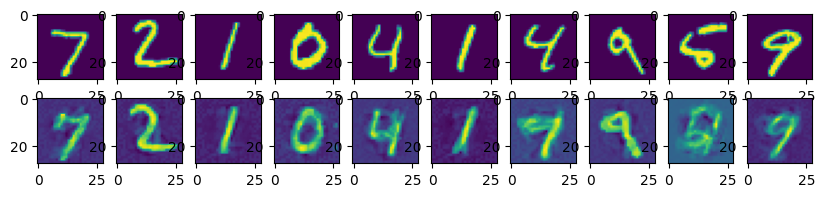

In [12]:
# lets check encoded and decoded images with original images
fig, ax = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    ax[0][i].imshow(np.reshape(x_image_test[i], (28, 28)))
    ax[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))